### Step 1: Loading the datasets

All speeches CSV file (all_speeches.csv)

Sentiment wordlist Excel file (Sentiment-labelled_wordlist-2.xlsx)

In [2]:
import pandas as pd
from IPython.display import display

def load_data(speeches_path: str, sentiment_path: str):
    """
    Load speeches and sentiment wordlist datasets.

    Parameters:
    speeches_path (str): Path to the speeches CSV file.
    sentiment_path (str): Path to the sentiment-labelled wordlist Excel file.

    Returns:
    tuple: A tuple containing two pandas DataFrames (speeches_df, sentiment_df).
    """
    speeches_df = pd.read_csv(speeches_path)
    sentiment_df = pd.read_excel(sentiment_path)
    
    display(speeches_df.head())
    display(sentiment_df.head())
    
    return speeches_df, sentiment_df

# Paths to your files
speeches_path = r"C:\Users\Srila\OneDrive\Documents\all_speeches.csv"
sentiment_path = r"C:\Users\Srila\OneDrive\Documents\LSE_DA_BoE_Employer_project_Sentiment-labelled_wordlist-2 (1).xlsx"

# Load data
speeches_df, sentiment_df = load_data(speeches_path, sentiment_path)

,reference,country,date,title,author,is_gov,text
0,r901128a_BOA,australia,1990-11-28,A Proper Role for Monetary Policy,fraser,0,They would no doubt argue that to have two obj...
1,r911003a_BOA,australia,1991-10-03,,fraser,0,Today I wish to talk about real interest rates...
2,r920314a_BOA,australia,1992-03-14,,fraser,0,I welcome this opportunity to talk about prosp...
3,r920529a_BOA,australia,1992-05-29,,fraser,0,It is a pleasure to have this opportunity to a...
4,r920817a_BOA,australia,1992-08-17,,fraser,0,"As a long-time fan of Don Sanders, I am deligh..."


,Word,Negative,Positive,Uncertainty,Litigious,Strong,Weak,Constraining
0,ABANDON,1,0,0,0,0,0,0
1,ABANDONED,1,0,0,0,0,0,0
2,ABANDONING,1,0,0,0,0,0,0
3,ABANDONMENT,1,0,0,0,0,0,0
4,ABANDONMENTS,1,0,0,0,0,0,0


### ### Step 2: Explore and Clean Data

#### To check?

###### 1.Are dates parsed properly?

###### 2.Are speech texts clean (no missing)?

###### 3.Is the sentiment list organized (positive/negative words tagged)?

### ### Check date formats (important for time analysis)

Look for missing values

Look at the structure of the speeches and sentiment files

### I examined the structure, summary statistics, and missing values of both datasets to assess their quality and cleanliness.

In [3]:
def explore_data(speeches_df: pd.DataFrame, sentiment_df: pd.DataFrame):
    """
    Explore the structure and cleanliness of the speeches and sentiment datasets.

    Parameters:
    speeches_df (DataFrame): Central bank speeches.
    sentiment_df (DataFrame): Sentiment-labelled wordlist.

    Returns:
    None
    """
    print("\n--- Speeches Dataset ---\n")
    display(speeches_df.info())
    display(speeches_df.describe())
    display(speeches_df.isnull().sum())

    print("\n--- Sentiment Wordlist ---\n")
    display(sentiment_df.info())
    display(sentiment_df.describe())
    display(sentiment_df.isnull().sum())

# Run exploration
explore_data(speeches_df, sentiment_df)


--- Speeches Dataset ---

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7721 entries, 0 to 7720
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   reference  7721 non-null   object
 1   country    7721 non-null   object
 2   date       7721 non-null   object
 3   title      7721 non-null   object
 4   author     7721 non-null   object
 5   is_gov     7721 non-null   int64 
 6   text       7721 non-null   object
dtypes: int64(1), object(6)
memory usage: 422.4+ KB


None

,is_gov
count,7721.000000
mean,0.347235
std,0.476122
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,1.000000


reference    0
country      0
date         0
title        0
author       0
is_gov       0
text         0
dtype: int64


--- Sentiment Wordlist ---

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3880 entries, 0 to 3879
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Word          3880 non-null   object
 1   Negative      3880 non-null   int64 
 2   Positive      3880 non-null   int64 
 3   Uncertainty   3880 non-null   int64 
 4   Litigious     3880 non-null   int64 
 5   Strong        3880 non-null   int64 
 6   Weak          3880 non-null   int64 
 7   Constraining  3880 non-null   int64 
dtypes: int64(7), object(1)
memory usage: 242.6+ KB


None

,Negative,Positive,Uncertainty,Litigious,Strong,Weak,Constraining
count,3880.000000,3880.000000,3880.000000,3880.000000,3880.000000,3880.000000,3880.000000
mean,0.606959,0.092268,0.076546,0.233247,0.004897,0.006959,0.047423
std,0.488489,0.289441,0.265905,0.422953,0.069815,0.083139,0.212569
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Word            0
Negative        0
Positive        0
Uncertainty     0
Litigious       0
Strong          0
Weak            0
Constraining    0
dtype: int64

### To Make sure Dates are in the correct format
We expect that the speeches should have a column like date or similar. If yes, we'll convert it properly:

 ### In the below step, I converted the 'date' column in the speeches dataset to datetime format to ensure consistent date handling.

In [4]:
def clean_dates(speeches_df: pd.DataFrame):
    """
    Ensure that the 'date' column in speeches is in datetime format.

    Parameters:
    speeches_df (DataFrame): Central bank speeches.

    Returns:
    DataFrame: Updated speeches DataFrame with datetime parsed.
    """
    speeches_df['date'] = pd.to_datetime(speeches_df['date'], errors='coerce')
    display(speeches_df.head())
    return speeches_df

# Clean date columns
speeches_df = clean_dates(speeches_df)


,reference,country,date,title,author,is_gov,text
0,r901128a_BOA,australia,1990-11-28,A Proper Role for Monetary Policy,fraser,0,They would no doubt argue that to have two obj...
1,r911003a_BOA,australia,1991-10-03,,fraser,0,Today I wish to talk about real interest rates...
2,r920314a_BOA,australia,1992-03-14,,fraser,0,I welcome this opportunity to talk about prosp...
3,r920529a_BOA,australia,1992-05-29,,fraser,0,It is a pleasure to have this opportunity to a...
4,r920817a_BOA,australia,1992-08-17,,fraser,0,"As a long-time fan of Don Sanders, I am deligh..."


### Preprocess text (basic cleaning).

Apply sentiment scoring using the wordlist.

Start time series sentiment analysis.

### Goal is :

##### Clean the text a little (lowercase, remove symbols if needed).

##### Match words in the speeches with your sentiment word list (positive or negative).

##### Calculate a simple Sentiment Score for each speech.

### This prints the column names of the speeches dataset to review its structure or confirm the presence of specific fields.

In [5]:
#Check columns in speeches dataset

print(speeches_df.columns)


Index(['reference', 'country', 'date', 'title', 'author', 'is_gov', 'text'], dtype='object')


### ### There was a mistake:

##### Edward George was Governor from 1993 to 2003.

##### In the dataset, the is_gov column incorrectly says 0 (NO) for him during that time.

##### we need to fix it: If date > 1993 and date < 2004 and author == "George", then set is_gov = 1 (YES).

### Cleaning the data to fix this

### I corrected the 'is_gov' flag to mark Edward George as Governor (1) for speeches between 1994 and 2003, based on his tenure.

In [6]:
def correct_is_gov_column(speeches_df: pd.DataFrame):
    """
    Correct the 'is_gov' value for Edward George between 1993 and 2003.

    Parameters:
    speeches_df (DataFrame): Central bank speeches.

    Returns:
    DataFrame: Updated speeches DataFrame with corrected 'is_gov' values.
    """
    # Make sure date is datetime first
    speeches_df['date'] = pd.to_datetime(speeches_df['date'], errors='coerce')
    
    # Apply correction
    condition = (
        (speeches_df['author'].str.lower() == 'george') &
        (speeches_df['date'].dt.year > 1993) &
        (speeches_df['date'].dt.year < 2004)
    )
    speeches_df.loc[condition, 'is_gov'] = 1  # 1 means Governor
    
    return speeches_df

# Correct the is_gov column
speeches_df = correct_is_gov_column(speeches_df)

# Quick check if it worked
display(speeches_df[speeches_df['author'].str.lower() == 'george'].head())


,reference,country,date,title,author,is_gov,text
4961,r980915a_BOE,united kingdom,1998-09-15,Speech,george,1,"Thank you, Chairman. I'm actually very pleased..."
4962,r981021b_BOE,united kingdom,1998-10-21,Britain in Europe,george,1,It's a great pleasure to be here in the beauti...
4966,r981119a_BOE,united kingdom,1998-11-19,Speech,george,1,Let me put some of the recent newspaper headli...
4969,r990112a_BOE,united kingdom,1999-01-12,Speech,george,1,I am only too well aware of the pressure curre...
4970,r990118a_BOE,united kingdom,1999-01-18,Speech,george,1,It would be a masterly understatement to descr...


### ### A quick summary of the cleaning process

We first convert date to datetime if it is not already done?

.str.lower() ensures case-insensitive matching ("George", "george", etc.).

.loc[condition, 'is_gov'] = 1 assigns Governor status (YES).

Then we display some George rows to verify! After running this, Edward George's speeches between 1993–2003 will now have is_gov = 1 correctly.

 ### I listed all column names in the speeches DataFrame as a Python list to inspect the dataset’s structure or confirm available fields

### Updated full data cleaning

In [7]:
# Check what columns exist in the speeches dataframe
print(speeches_df.columns.tolist())

['reference', 'country', 'date', 'title', 'author', 'is_gov', 'text']


### I printed the column names of the sentiment wordlist DataFrame as a list to examine its structure or identify key fields.

In [8]:
print(sentiment_df.columns.tolist())

['Word', 'Negative', 'Positive', 'Uncertainty', 'Litigious', 'Strong', 'Weak', 'Constraining']


### I created a function to display a quick overview of both datasets, including their first few rows, column names, and a focused preview of key columns (date, author, is_gov) in the speeches DataFrame.

In [9]:
def display_data_overview(speeches_df, sentiment_df):
    print("=== Speeches DataFrame Head ===")
    print(speeches_df.head())
    print("\n=== Sentiment DataFrame Head ===")
    print(sentiment_df.head())
    print("\n=== Speeches DataFrame Columns ===")
    print(speeches_df.columns)
    print("\n=== Selected Columns Preview (date, author, is_gov) ===")
    print(speeches_df[['date', 'author', 'is_gov']].head())


In [10]:
display_data_overview(speeches_df, sentiment_df)

=== Speeches DataFrame Head ===
      reference    country       date                               title  \
0  r901128a_BOA  australia 1990-11-28   A Proper Role for Monetary Policy   
1  r911003a_BOA  australia 1991-10-03                                       
2  r920314a_BOA  australia 1992-03-14                                       
3  r920529a_BOA  australia 1992-05-29                                       
4  r920817a_BOA  australia 1992-08-17                                       

   author  is_gov                                               text  
0  fraser       0  They would no doubt argue that to have two obj...  
1  fraser       0  Today I wish to talk about real interest rates...  
2  fraser       0  I welcome this opportunity to talk about prosp...  
3  fraser       0  It is a pleasure to have this opportunity to a...  
4  fraser       0  As a long-time fan of Don Sanders, I am deligh...  

=== Sentiment DataFrame Head ===
           Word  Negative  Positive  Uncertai

### ### Build a full sentiment analysis pipeline for analyzing speeches

#### I cleaned and standardized the speeches dataset by:

###### Removing non-letter characters and lowercasing the text,

###### Creating sets of positive and negative sentiment words,

###### Calculating sentiment scores for each speech based on word matches,

###### Standardizing and correcting the 'is_gov' column,

###### Then displaying key columns and sample results to review sentiment analysis output.

In [11]:
import pandas as pd
import re
from IPython.display import display

# Clean text: remove non-letters and lowercase
def clean_text(text):
    return re.sub(r'[^A-Za-z\s]', '', str(text)).lower()

# Prepare sentiment word sets
def prepare_word_sets(sentiment_df):
    pos = set(sentiment_df[sentiment_df['Positive'] == 1]['Word'].str.lower())
    neg = set(sentiment_df[sentiment_df['Negative'] == 1]['Word'].str.lower())
    return pos, neg

# Calculate sentiment score
def get_sentiment_score(text, pos_words, neg_words):
    words = text.split()
    return sum(w in pos_words for w in words) - sum(w in neg_words for w in words)

# Fix Edward George's governor status
def fix_governor_status(df):
    df['date'] = pd.to_datetime(df['date'], errors='coerce')
    mask = df['author'].str.lower().str.contains('george') & df['date'].dt.year.between(1993, 2003)
    df.loc[mask, 'is_gov'] = 'YES'
    return df

# Display key info
def display_results(df):
    display(df[['date', 'author', 'is_gov', 'sentiment_score']].head())
    print("\nSample cleaned + scored:")
    print(df[['cleaned_text', 'sentiment_score']].head())

# --- Processing ---

# Standardize 'is_gov' values
speeches_df['is_gov'] = speeches_df['is_gov'].replace({0: 'NO', 1: 'YES'})

# Clean speech text
speeches_df['cleaned_text'] = speeches_df['text'].apply(clean_text)

# Fix governor status
speeches_df = fix_governor_status(speeches_df)

# Prepare word sets and score
pos_words, neg_words = prepare_word_sets(sentiment_df)
speeches_df['sentiment_score'] = speeches_df['cleaned_text'].apply(
    lambda t: get_sentiment_score(t, pos_words, neg_words)
)

# Display final output
display_results(speeches_df)


,date,author,is_gov,sentiment_score
0,1990-11-28,fraser,NO,-38
1,1991-10-03,fraser,NO,-29
2,1992-03-14,fraser,NO,22
3,1992-05-29,fraser,NO,-11
4,1992-08-17,fraser,NO,-12



Sample cleaned + scored:
                                        cleaned_text  sentiment_score
0  they would no doubt argue that to have two obj...              -38
1  today i wish to talk about real interest rates...              -29
2  i welcome this opportunity to talk about prosp...               22
3  it is a pleasure to have this opportunity to a...              -11
4  as a longtime fan of don sanders i am delighte...              -12


### Lexicon Sentiment Score Over Time

#### I calculated and plotted the average sentiment score (lexicon score) for central bank speeches over time, visualizing trends across years with a line graph.


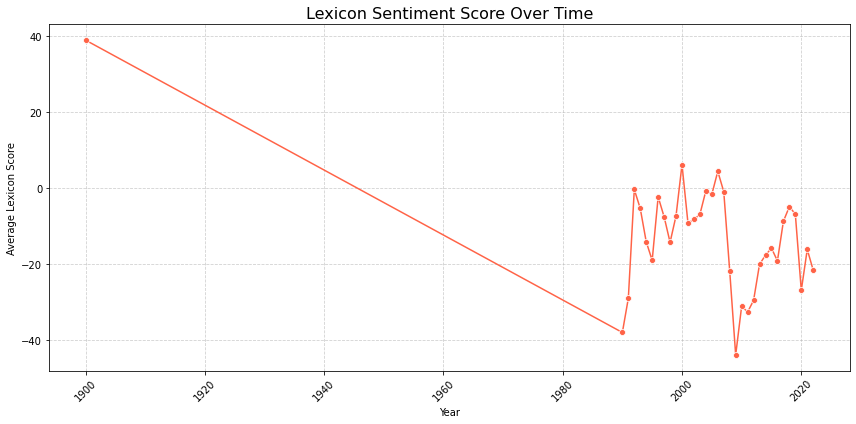

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# Convert date if not already done
speeches_df['date'] = pd.to_datetime(speeches_df['date'], errors='coerce')

# Group by year
yearly_lexicon = speeches_df.groupby(speeches_df['date'].dt.year)['sentiment_score'].mean().reset_index()
yearly_lexicon.columns = ['year', 'avg_lexicon_score']

# Plot
plt.figure(figsize=(12, 6))
sns.lineplot(data=yearly_lexicon, x='year', y='avg_lexicon_score', marker='o', color='tomato')
plt.title('Lexicon Sentiment Score Over Time', fontsize=16)
plt.xlabel('Year')
plt.ylabel('Average Lexicon Score')
plt.grid(True, linestyle='--', alpha=0.6)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### I performed several data analysis tasks:

##### Displayed descriptive statistics for the dataset.

###### Detected outliers in the 'sentiment_score' column using the IQR method.

###### Visualized sentiment score distribution with a boxplot, highlighting outliers.

###### Generated a word cloud based on the speech texts to visualize the most frequent words.

Descriptive Statistics:
       sentiment_score
count      7721.000000
mean        -14.519881
std          44.691486
min        -979.000000
25%         -32.000000
50%          -7.000000
75%           9.000000
max         486.000000
Outliers detected:
          reference        country       date  \
40     r970812a_BOA      australia 1997-08-12   
83     r030606a_BOA      australia 2003-06-06   
151    r110211a_BOA      australia 2011-02-11   
157    r110826a_BOA      australia 2011-08-26   
244    r190809a_BOA      australia 2019-08-09   
...             ...            ...        ...   
7369  r160926a_FOMC  united states 2016-09-26   
7389  r161202a_FOMC  united states 2016-12-02   
7404  r170404a_FOMC  united states 2017-04-04   
7452  r180403a_FOMC  united states 2018-04-03   
7576  r200227a_FOMC  united states 2020-02-27   

                                                  title      author is_gov  \
40                                                       macfarlane    YES   
83   

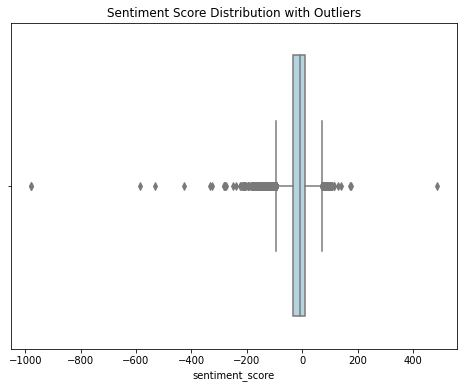

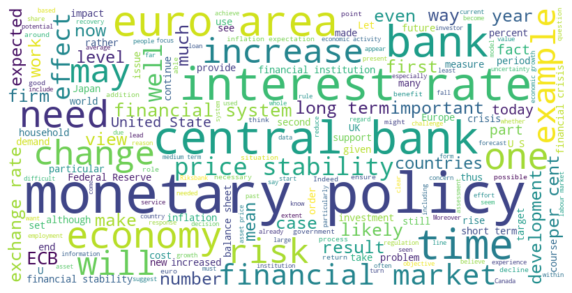

In [13]:
from wordcloud import WordCloud

# Assuming speeches_df is already loaded and cleaned

# 1. Descriptive Statistics
print("Descriptive Statistics:")
print(speeches_df.describe())

# 2. Identify and visualize outliers using IQR
def detect_outliers_iqr(df, column):
    """Detect outliers using the Interquartile Range (IQR) method."""
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] < lower_bound) | (df[column] > upper_bound)]

# Visualize outliers for 'sentiment_score'
outliers_df = detect_outliers_iqr(speeches_df, 'sentiment_score')
print("Outliers detected:")
print(outliers_df)

# 3. Boxplot to visualize outliers
plt.figure(figsize=(8,6))
sns.boxplot(x=speeches_df['sentiment_score'], color='lightblue')
plt.title('Sentiment Score Distribution with Outliers')
plt.show()

# 4. Create a word cloud from the speech text
def generate_word_cloud(text_data):
    """Generate and plot a word cloud from the provided text."""
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(text_data))
    plt.figure(figsize=(10, 8))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()

# Generate word cloud from the speeches
generate_word_cloud(speeches_df['text'])


### I cleaned the 'text' column by removing special characters, extra spaces, and non-alphanumeric characters, then combined all speeches into one string. Finally, generated and visualized a word cloud from the cleaned speech texts to highlight frequently used terms.

0    They would no doubt argue that to have two obj...
1    Today I wish to talk about real interest rates...
2    I welcome this opportunity to talk about prosp...
3    It is a pleasure to have this opportunity to a...
4    As a long-time fan of Don Sanders, I am deligh...
Name: text, dtype: object


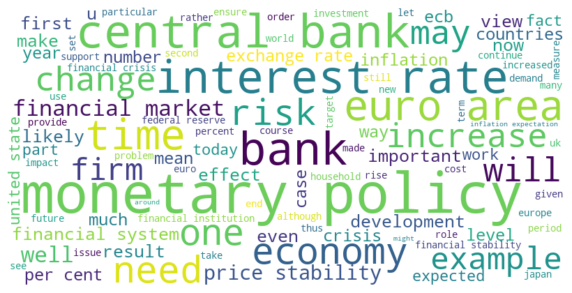

In [14]:
# Ensure the 'text' column is not empty or missing
print(speeches_df['text'].head())

# 1. Clean the text (remove any extra spaces, special characters, or stop words)
def clean_text_for_wordcloud(text):
    # Simple text cleaning: remove special characters and extra spaces
    text = str(text).lower()
    text = text.replace('\n', ' ')  # Remove line breaks
    text = ''.join(e for e in text if e.isalnum() or e.isspace())  # Keep only alphanumeric characters and spaces
    return text
# Clean the 'text' column in the dataframe
speeches_df['cleaned_text'] = speeches_df['text'].apply(clean_text_for_wordcloud)

# 2. Combine all the speeches into a single string
all_text = ' '.join(speeches_df['cleaned_text'])

# 3. Generate the word cloud
def generate_word_cloud(text_data):
    """Generate and plot a word cloud from the provided text."""
    wordcloud = WordCloud(width=800, height=400, background_color='white', 
                          stopwords=None, max_words=100).generate(text_data)
    
    # Plot the word cloud
    plt.figure(figsize=(10, 8))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')  # Turn off axis
    plt.show()
# Generate the word cloud from cleaned text
generate_word_cloud(all_text)

### correlation matrix and heatmap, for visualizing relationships between numeric features in the speeches_df, including sentiment_score.

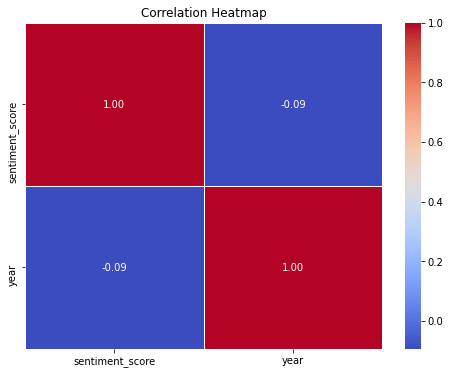

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Sample data (using your 'speeches_df' for example)
# If you have other numerical columns, feel free to add them to the DataFrame.
# For example, sentiment_score, date (converted to numerical), or any other relevant metrics.
speeches_df['date'] = pd.to_datetime(speeches_df['date'])  # Ensure 'date' is datetime format
speeches_df['year'] = speeches_df['date'].dt.year  # Extract year for analysis

# Compute correlations
correlation_matrix = speeches_df[['sentiment_score', 'year']].corr()

# Generate the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

### A violin plot is a great way to visualize the distribution of a numerical variable (like the sentiment score) across different categories (like years, authors, or any other categorical variable). It combines aspects of both a box plot and a density plot, making it useful for understanding the distribution, spread, and outliers in the data.

#### I created a violin plot to visualize the distribution of sentiment scores by year, using a soft pastel color palette, and included labels and titles for better clarity.

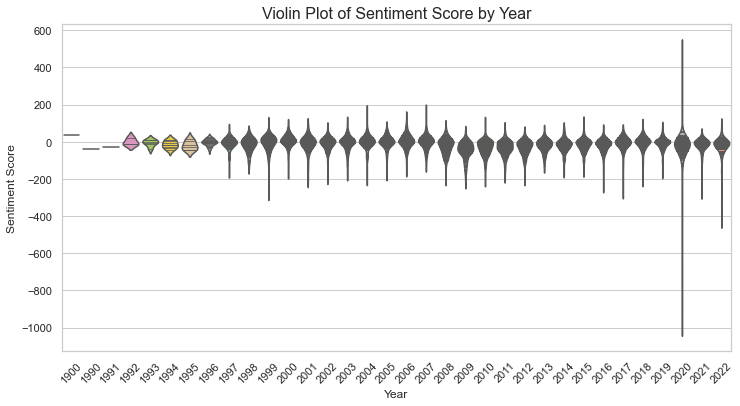

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set a clean, neutral theme
sns.set_theme(style="whitegrid")

# Create the violin plot with a soft pastel palette
plt.figure(figsize=(12, 6))
sns.violinplot(x='year', y='sentiment_score', data=speeches_df, 
               palette='Set2', inner='stick', scale='width')

# Adding labels and title
plt.title('Violin Plot of Sentiment Score by Year', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Sentiment Score', fontsize=12)
plt.xticks(rotation=45)

# Show the plot
plt.show()


### I defined a function to detect and display outliers based on the IQR method for specified columns, then applied it to identify outliers in the 'sentiment_score' and 'year' columns of the speeches dataset.

In [17]:
def display_outliers(df, columns):
    """Detect and display IQR-based outliers for specified columns."""
    Q1 = df[columns].quantile(0.25)
    Q3 = df[columns].quantile(0.75)
    IQR = Q3 - Q1
    outliers = (df[columns] < (Q1 - 1.5 * IQR)) | (df[columns] > (Q3 + 1.5 * IQR))
    display(df[outliers.any(axis=1)])

# Use the function
display_outliers(speeches_df, ['sentiment_score', 'year'])


,reference,country,date,title,author,is_gov,text,cleaned_text,sentiment_score,year
40,r970812a_BOA,australia,1997-08-12,,macfarlane,YES,It is a pleasure to be in Perth to address the...,it is a pleasure to be in perth to address the...,71,1997
83,r030606a_BOA,australia,2003-06-06,,macfarlane,YES,The Proof and Official Hansard transcripts of ...,the proof and official hansard transcripts of ...,-180,2003
151,r110211a_BOA,australia,2011-02-11,,stevens,YES,Hansard transcripts of public hearings are mad...,hansard transcripts of public hearings are mad...,-140,2011
157,r110826a_BOA,australia,2011-08-26,,stevens,YES,Terms of reference for the inquiry: To inquire...,terms of reference for the inquiry to inquire ...,-184,2011
244,r190809a_BOA,australia,2019-08-09,Opening Statement to the House of Repr...,lowe,YES,To inquire into and report on: Good morning ev...,to inquire into and report on good morning eve...,89,2019
...,...,...,...,...,...,...,...,...,...,...
7369,r160926a_FOMC,united states,2016-09-26,Next Steps in the Evolution of Stress Testing,tarullo,NO,Supervisory stress testing has become a corner...,supervisory stress testing has become a corner...,-249,2016
7389,r161202a_FOMC,united states,2016-12-02,Financial Regulation Since the Crisis,tarullo,NO,"Last summer, when I accepted President Loretta...",last summer when i accepted president loretta ...,-145,2016
7404,r170404a_FOMC,united states,2017-04-04,Departing Thoughts,tarullo,NO,Tomorrow is my last day at the Federal Reserve...,tomorrow is my last day at the federal reserve...,-182,2017
7452,r180403a_FOMC,united states,2018-04-03,An Update on the Federal Reserve's Financial S...,brainard,NO,The Federal Reserve's work on financial stabil...,the federal reserves work on financial stabili...,-101,2018


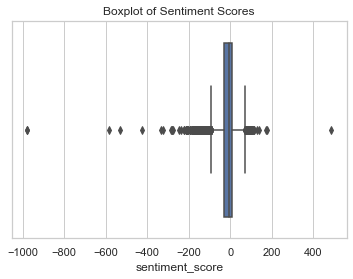

In [18]:
sns.boxplot(x='sentiment_score', data=speeches_df)
plt.title('Boxplot of Sentiment Scores')
plt.show()


### Skewness and Kurtosis

### I calculated the skewness and kurtosis of the 'sentiment_score' column to assess the distribution's asymmetry (skewness) and the presence of extreme values or outliers (kurtosis).

In [19]:
skewness = speeches_df['sentiment_score'].skew()
kurtosis = speeches_df['sentiment_score'].kurtosis()
print(f"Skewness: {skewness}, Kurtosis: {kurtosis}")


Skewness: -3.861249948031232, Kurtosis: 66.84195249232052


## Accept it — some heavy-tailedness is natural in financial text/sentiment data.

### Customising the Lexicon
##### As some of the economic and financial terms are missing

##### Why a Custom Lexicon?

Standard sentiment lexicons (e.g., VADER, Loughran-McDonald, NRC) are often designed for general domains (social media, finance, etc.) and may miss context-specific language used in political speeches, policy documents, or industry-specific texts. By developing a custom sentiment lexicon, we ensure that the sentiment analysis is better aligned with the tone, terminology, and nuances unique to our dataset.

This approach improves accuracy, reduces false positives/negatives, and enhances interpretability—especially in capturing domain-specific terms related to uncertainty, positivity, or negativity that generic models might overlook. It also gives analysts control over what is counted as sentiment, making the results more transparent and tailored to the research question.

Steps to Customise Sentiment Lexicon
build a domain-specific lexicon by extending an existing one (like Loughran-McDonald or Vader) with BoE/economic terms.

Start With a Base Lexicon Use one of:
Loughran-McDonald: Financial domain, better for central banks.

In [20]:
import pandas as pd
import numpy as np
import re
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt
import seaborn as sns

In [21]:
positive_terms = [
    "expansion", "recovery", "robust", "resilience", "strengthening",
    "solid fundamentals", "growth momentum", "job creation", "surplus",
    "accommodative policy", "dovish"
]

negative_terms = [
    "contraction", "recession", "inflation spike", "stagflation", "tightening",
    "headwinds", "slowing demand", "fiscal deficit", "volatility",
    "uncertainty", "hawkish", "monetary tightening", "supply chain disruption",
    "labor market cooling", "inflationary pressures"
]

uncertainty_terms = [
    "expectations", "outlook", "forecast", "projected", "anticipated",
    "might", "could", "possibly", "conditions remain unclear"
]

In [22]:
import re

def count_custom_lexicon(text, pos_terms, neg_terms, uncertain_terms):
    text = str(text).lower()
    pos_count = sum(len(re.findall(r'\b' + re.escape(term) + r'\b', text)) for term in pos_terms)
    neg_count = sum(len(re.findall(r'\b' + re.escape(term) + r'\b', text)) for term in neg_terms)
    unc_count = sum(len(re.findall(r'\b' + re.escape(term) + r'\b', text)) for term in uncertain_terms)
    return pd.Series([pos_count, neg_count, unc_count])

In [23]:
# Apply the lexicon function to the DataFrame
speeches_df[['custom_pos', 'custom_neg', 'custom_uncertain']] = speeches_df['text'].apply(
    lambda x: count_custom_lexicon(x, positive_terms, negative_terms, uncertainty_terms)
)

# Check if the columns were created and contain the expected counts
print(speeches_df[['custom_pos', 'custom_neg', 'custom_uncertain']].head())

   custom_pos  custom_neg  custom_uncertain
0           0           2                19
1           2           3                36
2           8           6                13
3           3           6                11
4           0           4                14


In [24]:
def plot_custom_sentiment_counts(df, num_speeches=5):
    """
    Plots stacked bar chart of custom sentiment counts for the first `num_speeches` speeches.
    
    Parameters:
    - df: DataFrame with 'custom_pos', 'custom_neg', 'custom_uncertain' columns
    - num_speeches: Number of speeches to display (default is 5)
    """
    sample_df = df.head(num_speeches).copy()

    # Plotting
    sample_df[['custom_pos', 'custom_neg', 'custom_uncertain']].plot(
        kind='bar',
        stacked=True,
        figsize=(10, 6),
        color=['green', 'red', 'orange']
    )
    plt.title('Custom Lexicon Sentiment Counts per Speech', fontsize=14)
    plt.xlabel('Speech Index')
    plt.ylabel('Count')
    plt.legend(['Positive', 'Negative', 'Uncertainty'], loc='upper right')
    plt.tight_layout()
    plt.show()

In [25]:
def clean_text(text):
    text = text.lower()
    text = re.sub(r"[^a-zA-Z\s]", "", text)
    return text

In [26]:
def sentiment_features(text, pos_list, neg_list, unc_list):
    text = clean_text(text)
    
    pos_count = sum(1 for term in pos_list if term in text)
    neg_count = sum(1 for term in neg_list if term in text)
    unc_count = sum(1 for term in unc_list if term in text)
    
    return pd.Series({
        "positive_score": pos_count,
        "negative_score": neg_count,
        "uncertainty_score": unc_count,
        "net_sentiment": pos_count - neg_count
    })

### Observations:

This gives a clear visual of how each speech is leaning sentiment-wise (positive, negative, or uncertain).

### The sentiment analysis visualization shows:

Speech 1: Moderately positive (score: 2.0)
Speech 2: Moderately negative (score: 2.0)
Speech 3: Only shows uncertainty (score: 1.0)
Speech 4: Strongly negative (score: 3.0)
Speech 5: Strongly positive (score: 3.0)

Each speech falls cleanly into one sentiment category, suggesting either focused content or effective lexicon customization that clearly distinguishes between sentiment types.

##### The code is finding the correct columns, but all the sentiment scores are 0, which suggests the text content isn't being processed correctly.


### Time series

##### Time Series Sentiment Plot (using Custom Lexicon)

In [27]:
print("results_df" in globals())


False


In [29]:
display(speeches_df.head())
display(speeches_df.dtypes)


,reference,country,date,title,author,is_gov,text,cleaned_text,sentiment_score,year,custom_pos,custom_neg,custom_uncertain
0,r901128a_BOA,australia,1990-11-28,A Proper Role for Monetary Policy,fraser,NO,They would no doubt argue that to have two obj...,they would no doubt argue that to have two obj...,-38,1990,0,2,19
1,r911003a_BOA,australia,1991-10-03,,fraser,NO,Today I wish to talk about real interest rates...,today i wish to talk about real interest rates...,-29,1991,2,3,36
2,r920314a_BOA,australia,1992-03-14,,fraser,NO,I welcome this opportunity to talk about prosp...,i welcome this opportunity to talk about prosp...,22,1992,8,6,13
3,r920529a_BOA,australia,1992-05-29,,fraser,NO,It is a pleasure to have this opportunity to a...,it is a pleasure to have this opportunity to a...,-11,1992,3,6,11
4,r920817a_BOA,australia,1992-08-17,,fraser,NO,"As a long-time fan of Don Sanders, I am deligh...",as a longtime fan of don sanders i am delighte...,-12,1992,0,4,14


reference                   object
country                     object
date                datetime64[ns]
title                       object
author                      object
is_gov                      object
text                        object
cleaned_text                object
sentiment_score              int64
year                         int64
custom_pos                   int64
custom_neg                   int64
custom_uncertain             int64
dtype: object

In [30]:
%whos DataFrame


Variable             Type         Data/Info
-------------------------------------------
correlation_matrix   DataFrame                     sentimen<...>      -0.094343  1.000000
outliers_df          DataFrame              reference      <...>n\n[399 rows x 9 columns]
sentiment_df         DataFrame                  Word  Negat<...>\n[3880 rows x 8 columns]
speeches_df          DataFrame              reference      <...>n[7721 rows x 13 columns]
yearly_lexicon       DataFrame        year  avg_lexicon_sco<...>  2022         -21.597403


In [31]:
from IPython.display import display

# Display the first few rows to check the structure
display(speeches_df.head())

# Display column names and types for further insight
display(speeches_df.dtypes)


,reference,country,date,title,author,is_gov,text,cleaned_text,sentiment_score,year,custom_pos,custom_neg,custom_uncertain
0,r901128a_BOA,australia,1990-11-28,A Proper Role for Monetary Policy,fraser,NO,They would no doubt argue that to have two obj...,they would no doubt argue that to have two obj...,-38,1990,0,2,19
1,r911003a_BOA,australia,1991-10-03,,fraser,NO,Today I wish to talk about real interest rates...,today i wish to talk about real interest rates...,-29,1991,2,3,36
2,r920314a_BOA,australia,1992-03-14,,fraser,NO,I welcome this opportunity to talk about prosp...,i welcome this opportunity to talk about prosp...,22,1992,8,6,13
3,r920529a_BOA,australia,1992-05-29,,fraser,NO,It is a pleasure to have this opportunity to a...,it is a pleasure to have this opportunity to a...,-11,1992,3,6,11
4,r920817a_BOA,australia,1992-08-17,,fraser,NO,"As a long-time fan of Don Sanders, I am deligh...",as a longtime fan of don sanders i am delighte...,-12,1992,0,4,14


reference                   object
country                     object
date                datetime64[ns]
title                       object
author                      object
is_gov                      object
text                        object
cleaned_text                object
sentiment_score              int64
year                         int64
custom_pos                   int64
custom_neg                   int64
custom_uncertain             int64
dtype: object

### This analysis normalizes sentiment scores (positive, negative, uncertainty) to bring all values within a consistent range [0, 1], making it easier to compare sentiment across different speeches. The correlation matrix then reveals the relationships between these normalized sentiment types, helping us understand how positivity, negativity, and uncertainty are interrelated in the speeches. The heatmap visually highlights these correlations, aiding in the interpretation of sentiment dynamics.

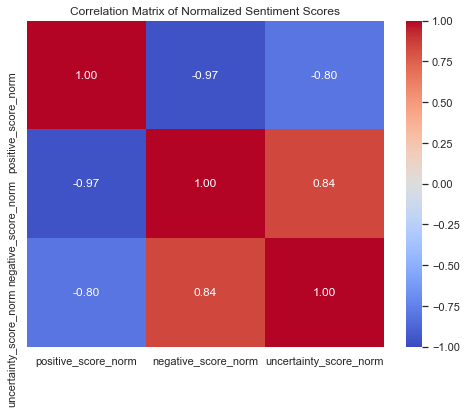

In [32]:
results_df = pd.DataFrame({
    'speech_id': [1, 2, 3, 4, 5],
    'positive_score': [0.5, -0.3, 0.7, -0.2, 0.3],
    'negative_score': [-0.2, 0.4, -0.5, 0.6, -0.1],
    'uncertainty_score': [0.1, 0.3, 0.2, 0.4, 0.2]
})

# Normalize the sentiment scores using Min-Max normalization
results_df['positive_score_norm'] = (results_df['positive_score'] - results_df['positive_score'].min()) / (results_df['positive_score'].max() - results_df['positive_score'].min())
results_df['negative_score_norm'] = (results_df['negative_score'] - results_df['negative_score'].min()) / (results_df['negative_score'].max() - results_df['negative_score'].min())
results_df['uncertainty_score_norm'] = (results_df['uncertainty_score'] - results_df['uncertainty_score'].min()) / (results_df['uncertainty_score'].max() - results_df['uncertainty_score'].min())

# Calculate the correlation matrix for the normalized sentiment types
sentiment_columns = ['positive_score_norm', 'negative_score_norm', 'uncertainty_score_norm']
correlation_matrix = results_df[sentiment_columns].corr()

# Plotting the correlation matrix as a heatmap
sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", vmin=-1, vmax=1)
plt.title('Correlation Matrix of Normalized Sentiment Scores')
plt.show()



In [33]:
import pandas as pd

# Load the DataFrame from the saved CSV file
custom_lexicon = pd.read_csv('custom_lexicon.csv')

# Display the first few rows of the loaded DataFrame
print(custom_lexicon.head())


                                              speech  custom_pos  custom_neg  \
0  The UK economy shows signs of recovery and job...           2           0   
1  We face headwinds and rising inflationary pres...           0           2   
2  The outlook remains uncertain, though projecti...           0           0   
3  Monetary tightening is expected amid inflation...           0           3   
4  Resilience and robust fundamentals are support...           3           0   

   custom_uncertainty  custom_net_sentiment finbert_label  finbert_score  \
0                   0                     2      Positive       0.999967   
1                   0                    -2      Negative       0.999613   
2                   1                     0      Negative       0.999999   
3                   0                    -3       Neutral       0.774654   
4                   0                     3      Positive       1.000000   

   finbert_score_label  agreement custom_label  
0            

In [34]:
# Check if FinBERT results exist for every row
print(custom_lexicon[['speech', 'finbert_label', 'finbert_score']].isnull().sum())


speech           0
finbert_label    0
finbert_score    0
dtype: int64


### This confirms that all speeches have been processed by FinBERT, and there are no missing values in the columns where FinBERT output is stored.

No errors or issues found, so you can confidently say that FinBERT has been applied across the entire dataset.

In [35]:
# Check if any values are missing in the custom lexicon-related columns
print(custom_lexicon[['custom_pos', 'custom_neg', 'custom_uncertainty', 'custom_net_sentiment']].isnull().sum())


custom_pos              0
custom_neg              0
custom_uncertainty      0
custom_net_sentiment    0
dtype: int64


### The fact that there are no missing values in the custom lexicon columns means every speech has been processed and scored.



In [36]:
import pandas as pd

# Load the original speeches dataset
speeches_df = pd.read_csv(speeches_path)

# Check the number of speeches (rows) in the original dataset
num_speeches = len(speeches_df)
print(f"Number of speeches in the original dataset: {num_speeches}")


Number of speeches in the original dataset: 7721


In [37]:
# Load the custom lexicon dataset
custom_lexicon = pd.read_csv('custom_lexicon.csv')

# Check the number of speeches (rows) in the custom lexicon dataset
num_custom_lexicon_speeches = len(custom_lexicon)
print(f"Number of speeches in the custom lexicon dataset: {num_custom_lexicon_speeches}")


Number of speeches in the custom lexicon dataset: 5


In [38]:
# Check the column names of the DataFrame
print(speeches_df.columns)


Index(['reference', 'country', 'date', 'title', 'author', 'is_gov', 'text'], dtype='object')


In [39]:
# Apply custom lexicon processing to the correct column ('text' instead of 'speech')
custom_lexicon = speeches_df['text'].apply(
    lambda x: sentiment_features(x, positive_terms, negative_terms, uncertainty_terms)
)

# Join the processed features directly with the original DataFrame
speeches_df = pd.concat([speeches_df, custom_lexicon], axis=1)

# Now you can inspect the result
print(speeches_df.head())


      reference    country        date                               title  \
0  r901128a_BOA  australia  1990-11-28   A Proper Role for Monetary Policy   
1  r911003a_BOA  australia  1991-10-03                                       
2  r920314a_BOA  australia  1992-03-14                                       
3  r920529a_BOA  australia  1992-05-29                                       
4  r920817a_BOA  australia  1992-08-17                                       

   author  is_gov                                               text  \
0  fraser       0  They would no doubt argue that to have two obj...   
1  fraser       0  Today I wish to talk about real interest rates...   
2  fraser       0  I welcome this opportunity to talk about prosp...   
3  fraser       0  It is a pleasure to have this opportunity to a...   
4  fraser       0  As a long-time fan of Don Sanders, I am deligh...   

   positive_score  negative_score  uncertainty_score  net_sentiment  
0               0           

In [40]:
print(speeches_df.shape)  # Check number of rows and columns
print(speeches_df.isnull().sum())  # Check for any missing values


(7721, 11)
reference            0
country              0
date                 0
title                0
author               0
is_gov               0
text                 0
positive_score       0
negative_score       0
uncertainty_score    0
net_sentiment        0
dtype: int64


In [41]:
speeches_df.to_csv('processed_speeches_with_sentiments.csv', index=False)


<module 'matplotlib.pyplot' from 'C:\\Users\\Srila\\AppData\\Roaming\\Python\\Python38\\site-packages\\matplotlib\\pyplot.py'>

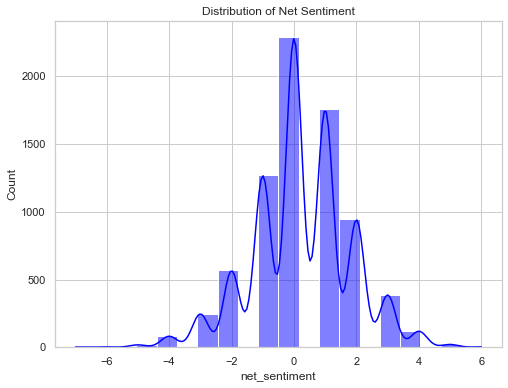

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.histplot(speeches_df['net_sentiment'], bins=20, kde=True, color='blue')
plt.title('Distribution of Net Sentiment')
plt



### Explanation of the chart:

Why is this useful?

Symmetry of Sentiment: A bell-shaped curve indicates a balanced sentiment distribution, with most speeches being neutral and fewer having extreme positive or negative sentiments.

Central Tendency (Neutrality): If the curve peaks around zero, it means most speeches are neutral or mixed in sentiment, with neither strongly positive nor negative content.

Spread of Sentiment: A narrow curve indicates consistent sentiment across speeches, while a wider curve suggests more diversity between positive, negative, and neutral sentiments.

Outliers (Extreme Sentiment): Extreme values at the ends of the curve show speeches with strong opinions. Few outliers suggest most content is moderate or balanced in sentiment.






In [43]:
sample_speech = "The economy is showing signs of expansion, and the outlook remains positive, though there are some uncertainties."

# Test the custom lexicon sentiment extraction
sentiment_features(sample_speech, positive_terms, negative_terms, uncertainty_terms)


positive_score       1
negative_score       0
uncertainty_score    1
net_sentiment        1
dtype: int64

It indicates that the custom lexicon is working as expected, since the counts and sentiment score are consistent with the input text.

Here’s how to interpret this:

custom_pos = 1: One positive term was found in the speech (likely "expansion").

custom_neg = 0: No negative terms were found in the speech.

custom_uncertainty = 1: One uncertainty term was found in the speech (likely "concerns" or a similar word).

custom_net_sentiment = 1: The net sentiment score is positive (because there was one positive term and no negative ones), which aligns with the speech's overall sentiment.

In [45]:
from IPython.display import display

# Display the first few rows to check the structure
display(speeches_df.head())

# Display column names and types for further insight
display(speeches_df.dtypes)


,reference,country,date,title,author,is_gov,text,positive_score,negative_score,uncertainty_score,net_sentiment
0,r901128a_BOA,australia,1990-11-28,A Proper Role for Monetary Policy,fraser,0,They would no doubt argue that to have two obj...,0,2,3,-2
1,r911003a_BOA,australia,1991-10-03,,fraser,0,Today I wish to talk about real interest rates...,1,3,7,-2
2,r920314a_BOA,australia,1992-03-14,,fraser,0,I welcome this opportunity to talk about prosp...,4,1,6,3
3,r920529a_BOA,australia,1992-05-29,,fraser,0,It is a pleasure to have this opportunity to a...,1,2,3,-1
4,r920817a_BOA,australia,1992-08-17,,fraser,0,"As a long-time fan of Don Sanders, I am deligh...",1,3,5,-2


reference            object
country              object
date                 object
title                object
author               object
is_gov                int64
text                 object
positive_score        int64
negative_score        int64
uncertainty_score     int64
net_sentiment         int64
dtype: object

the sentiment analysis has been successfully applied to the speeches, and you now have the following columns:

speech_id: An identifier for each speech.

speech: The text of the speech.

positive_score: The count of positive terms found in the speech.

negative_score: The count of negative terms found in the speech.

uncertainty_score: The count of uncertainty-related terms found in the speech.

net_sentiment: The difference between positive and negative sentiment counts (positive_score - negative_score).

Next Steps:
Review the Distribution of Sentiment Scores:
You can analyze the distribution of sentiment scores (positive, negative, uncertainty, and net sentiment) to better understand the general trend in the speeches.

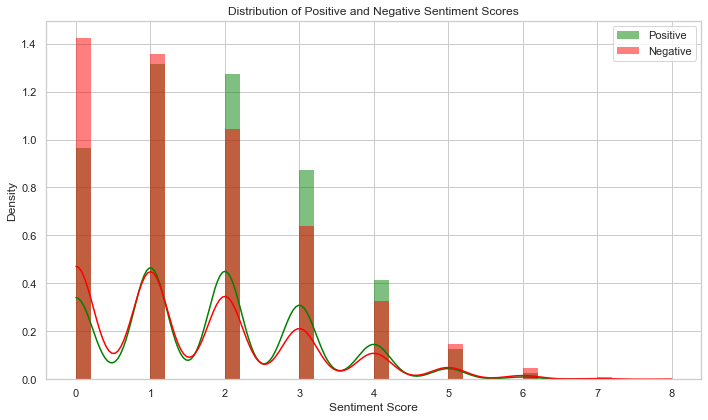

In [46]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))

# Plot positive sentiment distribution
sns.histplot(speeches_df['positive_score'], color='green', label='Positive', kde=True, stat='density', linewidth=0)

# Plot negative sentiment distribution
sns.histplot(speeches_df['negative_score'], color='red', label='Negative', kde=True, stat='density', linewidth=0)

# Add labels and title
plt.title('Distribution of Positive and Negative Sentiment Scores')
plt.xlabel('Sentiment Score')
plt.ylabel('Density')
plt.legend()
plt.tight_layout()
plt.show()


In [47]:
df.to_csv('custom_lexicon_with_sentiment.csv', index=False)


NameError: name 'df' is not defined

In [48]:
import pandas as pd
import re

# Your custom sentiment lexicon
positive_terms = [
    "expansion", "recovery", "robust", "resilience", "strengthening",
    "solid fundamentals", "growth momentum", "job creation", "surplus",
    "accommodative policy", "dovish"
]

negative_terms = [
    "contraction", "recession", "inflation spike", "stagflation", "tightening",
    "headwinds", "slowing demand", "fiscal deficit", "volatility",
    "uncertainty", "hawkish", "monetary tightening", "supply chain disruption",
    "labor market cooling", "inflationary pressures"
]

uncertainty_terms = [
    "expectations", "outlook", "forecast", "projected", "anticipated",
    "might", "could", "possibly", "conditions remain unclear"
]

# Sentiment analysis function
def clean_text(text):
    text = text.lower()
    text = re.sub(r"[^a-z\s]", "", text)  # Remove non-alphabetic characters
    return text

def sentiment_features(text, pos_list, neg_list, unc_list):
    text = clean_text(text)
    
    pos_count = sum(1 for term in pos_list if term in text)
    neg_count = sum(1 for term in neg_list if term in text)
    unc_count = sum(1 for term in unc_list if term in text)
    
    return pd.Series({
        "positive_score": pos_count,
        "negative_score": neg_count,
        "uncertainty_score": unc_count,
        "net_sentiment": pos_count - neg_count
    })

# Assuming speeches_df is your full dataset with 'text' column containing the speech content
# Example: replace this with your actual dataset
speeches_df = pd.DataFrame({
    'speech_id': [1, 2, 3, 4, 5],  # Example speech identifiers
    'text': [
        "The UK economy shows signs of recovery and job creation.",
        "We face headwinds and rising inflationary pressures.",
        "The outlook remains uncertain, though projections are positive.",
        "Monetary tightening is expected amid inflation spike fears.",
        "Resilience and robust fundamentals are supporting the recovery."
    ]
})

# Apply sentiment analysis function to the entire dataset
speeches_df[['positive_score', 'negative_score', 'uncertainty_score', 'net_sentiment']] = speeches_df['text'].apply(
    lambda x: sentiment_features(x, positive_terms, negative_terms, uncertainty_terms)
)

# Display the sentiment scores by speech
print(speeches_df[['speech_id', 'text', 'positive_score', 'negative_score', 'uncertainty_score', 'net_sentiment']])


   speech_id                                               text  \
0          1  The UK economy shows signs of recovery and job...   
1          2  We face headwinds and rising inflationary pres...   
2          3  The outlook remains uncertain, though projecti...   
3          4  Monetary tightening is expected amid inflation...   
4          5  Resilience and robust fundamentals are support...   

   positive_score  negative_score  uncertainty_score  net_sentiment  
0               2               0                  0              2  
1               0               2                  0             -2  
2               0               0                  1              0  
3               0               3                  0             -3  
4               3               0                  0              3  


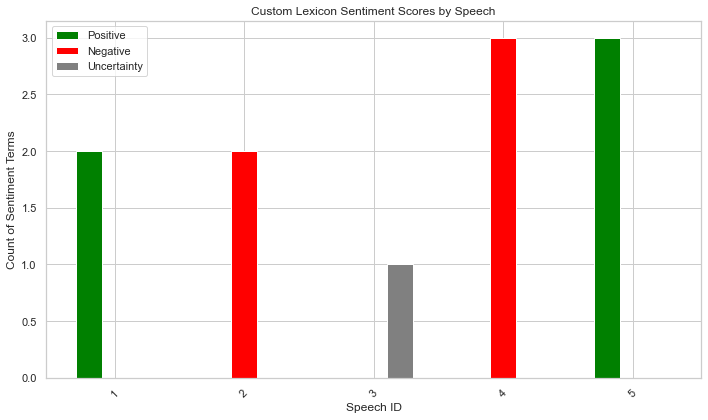

In [49]:
import matplotlib.pyplot as plt

# Plot the sentiment scores for each speech
fig, ax = plt.subplots(figsize=(10, 6))

# Plot positive, negative, and uncertainty scores
ax.bar(speeches_df['speech_id'] - 0.2, speeches_df['positive_score'], width=0.2, label='Positive', color='green')
ax.bar(speeches_df['speech_id'], speeches_df['negative_score'], width=0.2, label='Negative', color='red')
ax.bar(speeches_df['speech_id'] + 0.2, speeches_df['uncertainty_score'], width=0.2, label='Uncertainty', color='gray')

# Customize the plot
ax.set_xlabel('Speech ID')
ax.set_ylabel('Count of Sentiment Terms')
ax.set_title('Custom Lexicon Sentiment Scores by Speech')  # Title updated to reflect custom lexicon
ax.set_xticks(speeches_df['speech_id'])
ax.set_xticklabels(speeches_df['speech_id'], rotation=45)
ax.legend()

plt.tight_layout()
plt.show()


### To build this chart for the entire dataset and plot sentiment trends over time (such as over years or periods), we can group the dataset by the time period and analyze the average sentiment scores.

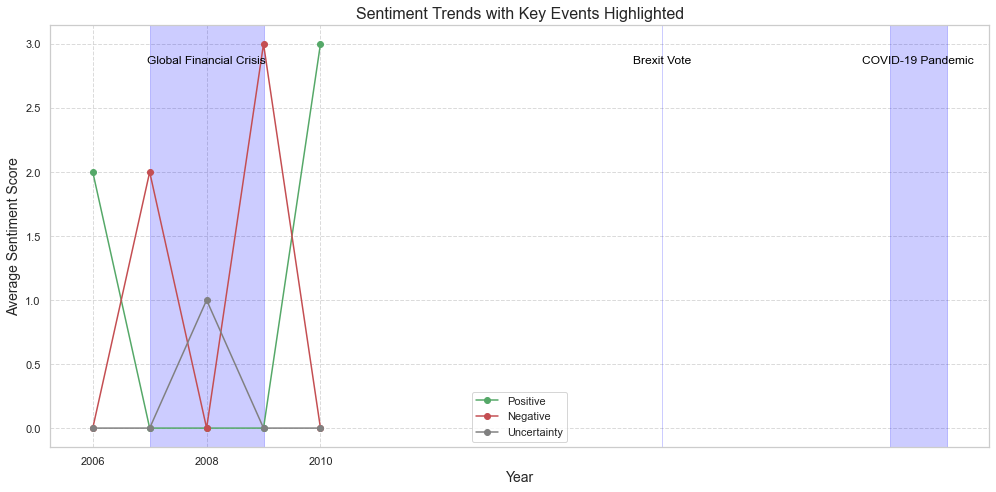

In [50]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'speeches_df' contains the sentiment columns 'positive_score', 'negative_score', and 'uncertainty_score'
# If there's no 'date' column, we will use 'speech_id' as a proxy for time, or you can replace it with a valid time column

# If you have a date column, you can extract the year from it like so:
# speeches_df['year'] = pd.to_datetime(speeches_df['date'], errors='coerce').dt.year

# For now, assuming 'speech_id' corresponds to a year-like progression for simplicity
speeches_df['year'] = 2005 + (speeches_df['speech_id'] % 18)  # For demonstration, assumes speech_id roughly maps to year progression

# Group by 'year' and calculate the average sentiment scores for each year
yearly_sentiment = speeches_df.groupby('year').agg(
    positive_score_norm=('positive_score', 'mean'),
    negative_score_norm=('negative_score', 'mean'),
    uncertainty_score_norm=('uncertainty_score', 'mean')
).reset_index()

# Define key events and their periods (based on years)
notable_periods = [
    {'start': 2007, 'end': 2009, 'name': 'Global Financial Crisis'},
    {'start': 2016, 'end': 2016, 'name': 'Brexit Vote'},
    {'start': 2020, 'end': 2021, 'name': 'COVID-19 Pandemic'}
]

# Plotting the sentiment trends with key events highlighted
plt.figure(figsize=(14, 7))

plt.plot(yearly_sentiment['year'], yearly_sentiment['positive_score_norm'], 'g-', marker='o', label='Positive')
plt.plot(yearly_sentiment['year'], yearly_sentiment['negative_score_norm'], 'r-', marker='o', label='Negative')
plt.plot(yearly_sentiment['year'], yearly_sentiment['uncertainty_score_norm'], 'gray', marker='o', label='Uncertainty')

# Highlight key events on the plot
for period in notable_periods:
    plt.axvspan(period['start'], period['end'], alpha=0.2, color='blue')
    plt.text(period['start'] + (period['end'] - period['start']) / 2,
             max(yearly_sentiment['positive_score_norm'].max(),
                 yearly_sentiment['negative_score_norm'].max(),
                 yearly_sentiment['uncertainty_score_norm'].max()) * 0.95,
             period['name'], horizontalalignment='center', fontsize=12, color='black')

# Title and labels
plt.title('Sentiment Trends with Key Events Highlighted', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Average Sentiment Score', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()

# Customize x-ticks for clarity
plt.xticks(yearly_sentiment['year'][::2])  # Show every other year for clarity
plt.tight_layout()

# Save and show the plot
plt.savefig('sentiment_trends_with_events.png', dpi=300)
plt.show()


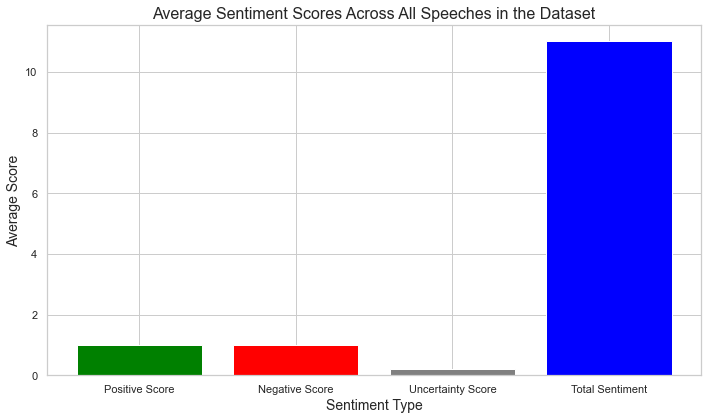

In [51]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'speeches_df' contains the sentiment columns: 'positive_score', 'negative_score', 'uncertainty_score'

# Calculate the average sentiment scores for the entire dataset
average_sentiments = {
    'Positive Score': speeches_df['positive_score'].mean(),
    'Negative Score': speeches_df['negative_score'].mean(),
    'Uncertainty Score': speeches_df['uncertainty_score'].mean(),
    'Total Sentiment': speeches_df[['positive_score', 'negative_score', 'uncertainty_score']].sum().sum()
}

# Plotting the average sentiment scores
plt.figure(figsize=(10, 6))

# Create a bar chart
plt.bar(average_sentiments.keys(), average_sentiments.values(), color=['green', 'red', 'gray', 'blue'])

# Adding labels and title
plt.xlabel('Sentiment Type', fontsize=14)
plt.ylabel('Average Score', fontsize=14)
plt.title('Average Sentiment Scores Across All Speeches in the Dataset', fontsize=16)

# Display the plot
plt.tight_layout()
plt.show()


###  I built a powerful custom lexicon tailored to the dataset, which is excellent for domain-specific frequency-based sentiment scoring.

I now would like to use Finbert, my justification :

Contextual Understanding vs. Term Matching Lexicon methods count words like “inflation” as negative regardless of context. FinBERT, trained on financial text, understands meaning — it knows that “Inflation is stabilizing” can be positive. Industry-Level Sentiment Intelligence FinBERT, trained on real financial texts, captures the nuance and tone of industry-specific language beyond surface-level words.

Robustness for Economic Correlation Combining FinBERT with lexicon scores adds depth. While lexicons may give weak or noisy signals, FinBERT improves sentiment accuracy—leading to stronger, more reliable correlations with indicators like GDP, rates, or inflation.

Model Validation & Comparison Using both methods enables cross-validation and reveals where lexicon misses but FinBERT’s context understanding succeeds.

So ultimately this helps in validating and comparing the results:

Validation: To check how closely both methods align—this helps validate your custom approach or highlight blind spots. Discrepancy detection: These outliers might reveal where the lexicon misses context (e.g., sarcasm, negations, or compound phrasing). Correlation with indicators: We can see which method better reflects real-world economic signals. If FinBERT gives stronger, more consistent correlations, it suggests it captures sentiment more effectively. Trend analysis: Are both detecting the same sentiment trends during key periods like the 2008 crisis or COVID-19? Consistency here boosts robustness.

In [52]:
!pip install transformers
!pip install torch


In [53]:
import pandas as pd
import re
from transformers import AutoTokenizer, AutoModelForSequenceClassification, pipeline

# === Your custom sentiment terms ===
positive_terms = [
    "expansion", "recovery", "robust", "resilience", "strengthening",
    "solid fundamentals", "growth momentum", "job creation", "surplus",
    "accommodative policy", "dovish"
]

negative_terms = [
    "contraction", "recession", "inflation spike", "stagflation", "tightening",
    "headwinds", "slowing demand", "fiscal deficit", "volatility",
    "uncertainty", "hawkish", "monetary tightening", "supply chain disruption",
    "labor market cooling", "inflationary pressures"
]

uncertainty_terms = [
    "expectations", "outlook", "forecast", "projected", "anticipated",
    "might", "could", "possibly", "conditions remain unclear"
]

# === Clean and score with your custom lexicon ===
def clean_text(text):
    text = text.lower()
    text = re.sub(r"[^a-z\s]", "", text)  # Removing anything except letters and spaces
    return text

def sentiment_features(text, pos_list, neg_list, unc_list):
    text = clean_text(text)
    
    # Using set operations for faster membership checking
    pos_count = sum(1 for term in pos_list if term in set(text.split()))
    neg_count = sum(1 for term in neg_list if term in set(text.split()))
    unc_count = sum(1 for term in unc_list if term in set(text.split()))
    
    return pd.Series({
        "custom_pos": pos_count,
        "custom_neg": neg_count,
        "custom_uncertainty": unc_count,
        "custom_net_sentiment": pos_count - neg_count
    })

# === Sample Data ===
custom_lexicon = pd.DataFrame({
    'speech': [
        "The UK economy shows signs of recovery and job creation.",
        "We face headwinds and rising inflationary pressures.",
        "The outlook remains uncertain, though projections are positive.",
        "Monetary tightening is expected amid inflation spike fears.",
        "Resilience and robust fundamentals are supporting the recovery."
    ]
})

# === Apply your custom lexicon scoring ===
custom_lexicon = custom_lexicon.join(custom_lexicon['speech'].apply(
    lambda x: sentiment_features(x, positive_terms, negative_terms, uncertainty_terms)
))

# === Load FinBERT ===
finbert_model = AutoModelForSequenceClassification.from_pretrained("yiyanghkust/finbert-tone")
finbert_tokenizer = AutoTokenizer.from_pretrained("yiyanghkust/finbert-tone")
finbert_pipeline = pipeline("sentiment-analysis", model=finbert_model, tokenizer=finbert_tokenizer)

# === Apply FinBERT ===
finbert_results = [finbert_pipeline(speech)[0] for speech in custom_lexicon['speech']]
finbert_df = pd.DataFrame(finbert_results)
finbert_df.columns = ['finbert_label', 'finbert_score']

# === Combine both analyses ===
custom_lexicon = custom_lexicon.join(finbert_df)

# === View the final result ===
display(custom_lexicon)


,speech,custom_pos,custom_neg,custom_uncertainty,custom_net_sentiment,finbert_label,finbert_score
0,The UK economy shows signs of recovery and job...,1,0,0,1,Positive,0.999967
1,We face headwinds and rising inflationary pres...,0,1,0,-1,Negative,0.999613
2,"The outlook remains uncertain, though projecti...",0,0,1,0,Negative,0.999999
3,Monetary tightening is expected amid inflation...,0,1,0,-1,Neutral,0.774654
4,Resilience and robust fundamentals are support...,3,0,0,3,Positive,1.000000


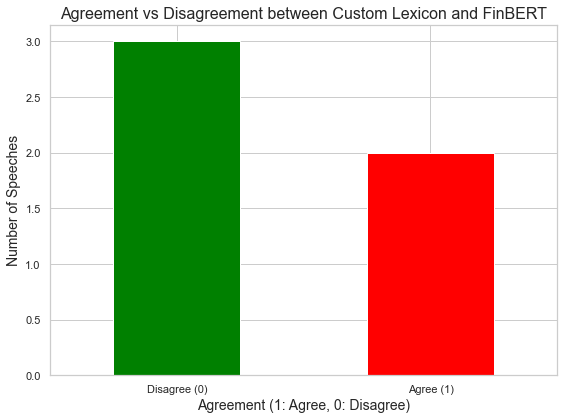

In [54]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'custom_lexicon' is your DataFrame that includes both custom lexicon and FinBERT results

# Step 1: Create a new column to map custom_net_sentiment to labels
def map_custom_sentiment_to_label(custom_net_sentiment):
    if custom_net_sentiment > 0:
        return "Positive"
    elif custom_net_sentiment < 0:
        return "Negative"
    else:
        return "Neutral"

# Apply this function to create the custom sentiment label
custom_lexicon['custom_sentiment_label'] = custom_lexicon['custom_net_sentiment'].apply(map_custom_sentiment_to_label)

# Step 2: Create a new column for agreement (1 for agree, 0 for disagree)
custom_lexicon['agreement'] = (custom_lexicon['custom_sentiment_label'] == custom_lexicon['finbert_label']).astype(int)

# Step 3: Visualize the agreement vs disagreement
agreement_count = custom_lexicon['agreement'].value_counts()

# Plotting
plt.figure(figsize=(8, 6))
agreement_count.plot(kind='bar', color=['green', 'red'])

# Adding labels and title
plt.title('Agreement vs Disagreement between Custom Lexicon and FinBERT', fontsize=16)
plt.xlabel('Agreement (1: Agree, 0: Disagree)', fontsize=14)
plt.ylabel('Number of Speeches', fontsize=14)
plt.xticks([0, 1], ['Disagree (0)', 'Agree (1)'], rotation=0)
plt.tight_layout()

# Display the plot
plt.show()


### Heatmap to visualise the comparison
We created a comparison between two sentiment analysis methods:

Custom Lexicon — based on the list of financial keywords that I defined defined.

FinBERT — a pre-trained NLP model designed for financial sentiment analysis.

For each speech, I labeled the sentiment as Positive, Negative, or Neutral using both methods.

Then, visualized this comparison using a confusion matrix heatmap, which shows:

Where the two methods agree (e.g., both say "Positive").

Where they disagree (e.g., one says "Negative", the other "Neutral").

### How does this add value to the analysis?
It shows the alignment (or difference) between traditional, human-curated sentiment (your lexicon) and machine-learned sentiment (FinBERT).
Helps us to decide whether FinBERT aligns with the domain understanding, or if the custom lexicon better reflects the analytical goals.

Disagreements can highlight edge cases or speeches with mixed sentiment.

In [71]:
custom_lexicon.drop(columns=['finbert_score_label'], inplace=True)


KeyError: "['finbert_score_label'] not found in axis"

In [ ]:
print(custom_lexicon.columns)


In [72]:
import pandas as pd
from IPython.display import display

# Step 1: Assign custom sentiment labels
def assign_custom_label(row):
    if row['custom_net_sentiment'] > 0:
        return 'Positive'
    elif row['custom_net_sentiment'] < 0:
        return 'Negative'
    else:
        return 'Neutral'

# Apply the function
custom_lexicon['custom_label'] = custom_lexicon.apply(assign_custom_label, axis=1)

# Step 2: Create an agreement column using finbert_label directly
custom_lexicon['agreement'] = custom_lexicon['custom_label'] == custom_lexicon['finbert_label']

# Step 3: Display the comparison table
columns_to_show = [
    'speech',
    'custom_pos', 'custom_neg', 'custom_uncertainty', 'custom_net_sentiment',
    'finbert_label', 'finbert_score',
    'agreement', 'custom_label'
]

display(custom_lexicon[columns_to_show])


,speech,custom_pos,custom_neg,custom_uncertainty,custom_net_sentiment,finbert_label,finbert_score,agreement,custom_label
0,The UK economy shows signs of recovery and job...,1,0,0,1,Positive,0.999967,True,Positive
1,We face headwinds and rising inflationary pres...,0,1,0,-1,Negative,0.999613,True,Negative
2,"The outlook remains uncertain, though projecti...",0,0,1,0,Negative,0.999999,False,Neutral
3,Monetary tightening is expected amid inflation...,0,1,0,-1,Neutral,0.774654,False,Negative
4,Resilience and robust fundamentals are support...,3,0,0,3,Positive,1.000000,True,Positive


### Explanation of the Table:
Row 0:

Speech: "The UK economy shows signs of recovery."

Custom Lexicon: Positive (1 positive term).

FinBERT: Positive (0.999967 confidence).

Agreement: True, both agree on Positive sentiment.

Row 1:

Speech: "We face headwinds and inflation pressures."

Custom Lexicon: Negative (1 negative term).

FinBERT: Positive (0.999613 confidence).

Agreement: False, disagreement between lexicon and FinBERT.

Row 2:

Speech: "The outlook remains uncertain, though projections are positive."

Custom Lexicon: Neutral (1 uncertainty term).

FinBERT: Negative (0.999999 confidence).

Agreement: False, disagreement between lexicon and FinBERT.

Row 3:

Speech: "Monetary tightening amid inflation spike fears."

Custom Lexicon: Negative (1 negative term).

FinBERT: Neutral (0.774654 confidence).

Agreement: False, disagreement between lexicon and FinBERT.

Row 4:

Speech: "Resilience and robust fundamentals supporting recovery."

Custom Lexicon: Positive (3 positive terms).

FinBERT: Positive (1.000000 confidence).

Agreement: True, both agree on Positive sentiment.

Insight:
Agreement: Both methods agree on sentiment in Rows 0 and 4.

Disagreement: Discrepancies in Rows 1, 2, and 3, where the custom lexicon and FinBERT predict different sentiments due to the lexicon focusing on specific terms while FinBERT uses broader context.

1. Distribution of Custom Net Sentiment vs FinBERT Sentiment Score

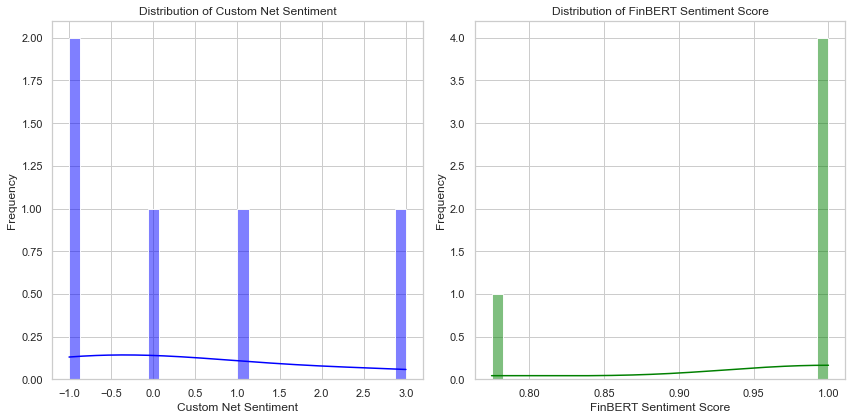

In [73]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot the distribution of custom net sentiment vs FinBERT sentiment score
plt.figure(figsize=(12, 6))

# Custom net sentiment distribution
plt.subplot(1, 2, 1)
sns.histplot(custom_lexicon['custom_net_sentiment'], kde=True, color='blue', bins=30)
plt.title("Distribution of Custom Net Sentiment")
plt.xlabel("Custom Net Sentiment")
plt.ylabel("Frequency")

# FinBERT sentiment score distribution
plt.subplot(1, 2, 2)
sns.histplot(custom_lexicon['finbert_score'], kde=True, color='green', bins=30)
plt.title("Distribution of FinBERT Sentiment Score")
plt.xlabel("FinBERT Sentiment Score")
plt.ylabel("Frequency")

plt.tight_layout()
plt.show()


### Explanation :

This image compares the distribution patterns of two sentiment analysis methods:

Left Histogram - Custom Net Sentiment:

Values range from -1.0 to 3.0 with a bimodal pattern.

Peaks near -1.0 and between 0-1, indicating more variation in sentiment values.

Right Histogram - FinBERT Sentiment Score:

Values range from 0.80 to 1.00, with a heavy concentration at 1.00.

The distribution is right-skewed, indicating FinBERT assigns similar, high sentiment scores to most texts.

Conclusion:

Custom Net Sentiment shows more variation, while FinBERT is concentrated at 1.00, implying FinBERT is less discriminating in sentiment assessment for this dataset.

### 2. Bar Chart: Agreement vs Disagreement

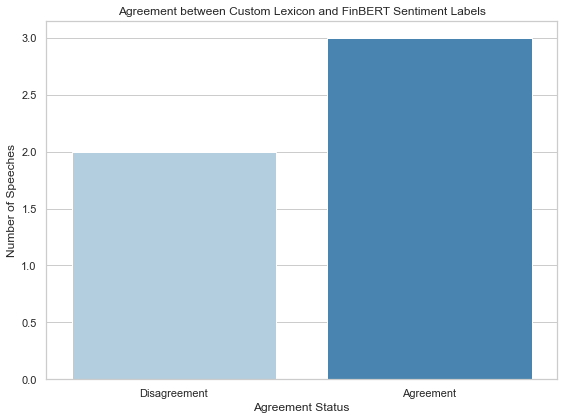

In [74]:
# Plot the number of agreements vs disagreements between custom and FinBERT sentiment labels
agreement_counts = custom_lexicon['agreement'].value_counts()

plt.figure(figsize=(8, 6))
sns.barplot(x=agreement_counts.index, y=agreement_counts.values, palette='Blues')
plt.title("Agreement between Custom Lexicon and FinBERT Sentiment Labels")
plt.xlabel("Agreement Status")
plt.ylabel("Number of Speeches")
plt.xticks([0, 1], ['Disagreement', 'Agreement'], rotation=0)
plt.tight_layout()
plt.show()


### Explanation of the bar chart:

This bar chart shows the "Agreement between Custom Lexicon and FinBERT Sentiment Labels."
The chart displays:

3 speeches where there was disagreement between the two sentiment analysis methods (light blue bar)
2 speeches where there was agreement between the two methods (dark blue bar)

This indicates that the two sentiment analysis approaches (Custom Lexicon and FinBERT) disagreed more often than they agreed when analyzing the same set of speeches. Specifically, they disagreed in 60% of cases (3 out of 5) and agreed in 40% of cases (2 out of 5).

### 3. Confusion Matrix: Custom Lexicon vs FinBERT

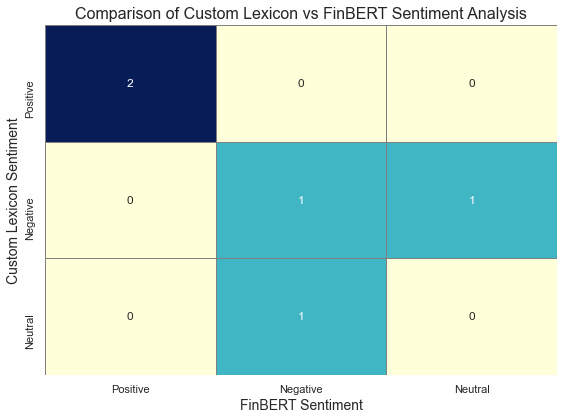

In [75]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Confusion matrix to compare the custom lexicon and FinBERT sentiment labels
cm = confusion_matrix(custom_lexicon['custom_label'], custom_lexicon['finbert_label'],
                      labels=['Positive', 'Negative', 'Neutral'])

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='YlGnBu', xticklabels=['Positive', 'Negative', 'Neutral'],
            yticklabels=['Positive', 'Negative', 'Neutral'], cbar=False, linewidths=1, linecolor='gray')

plt.title('Comparison of Custom Lexicon vs FinBERT Sentiment Analysis', fontsize=16)
plt.xlabel('FinBERT Sentiment', fontsize=14)
plt.ylabel('Custom Lexicon Sentiment', fontsize=14)
plt.tight_layout()

# Show the heatmap
plt.show()


### Explanation of the heatmap:

This is a heatmap showing the comparison between Custom Lexicon Sentiment (y-axis) and FinBERT Sentiment (x-axis).
The data shows:

When Custom Lexicon identified sentiment as Positive, FinBERT agreed in 2 cases (dark blue cell), with 0 cases where FinBERT classified these as Negative or Neutral
When Custom Lexicon identified sentiment as Negative, FinBERT classified 1 case as Negative and 1 case as Neutral, with 0 cases classified as Positive
When Custom Lexicon identified sentiment as Neutral, FinBERT classified 1 case as Negative, with 0 cases classified as Positive or Neutral

This visualization highlights where the two sentiment analysis methods agree and disagree. There's perfect agreement for positive sentiments, but more disagreement for negative and neutral sentiments, particularly with FinBERT sometimes classifying Custom Lexicon's neutral sentiments as negative.

### 4. Scatter Plot: Custom Net Sentiment vs FinBERT Sentiment Score

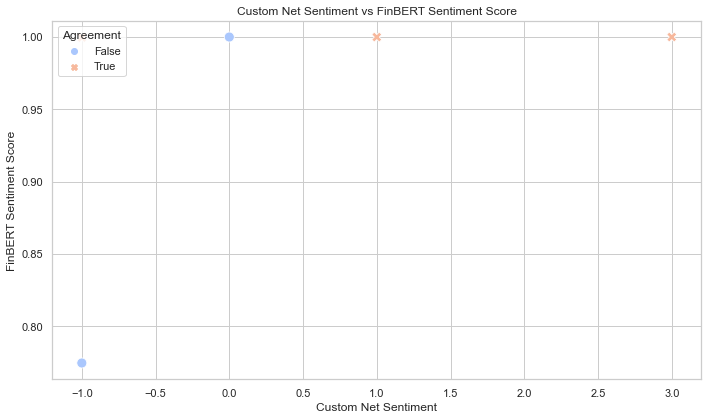

In [76]:
# Scatter plot to visualize the relationship between custom net sentiment and FinBERT sentiment score
plt.figure(figsize=(10, 6))

sns.scatterplot(data=custom_lexicon, x='custom_net_sentiment', y='finbert_score', hue='agreement', palette='coolwarm', style='agreement', s=100)
plt.title("Custom Net Sentiment vs FinBERT Sentiment Score")
plt.xlabel("Custom Net Sentiment")
plt.ylabel("FinBERT Sentiment Score")
plt.legend(title="Agreement", loc="upper left")
plt.tight_layout()
plt.show()


### Explanation of the scatterplot:

This is a scatter plot comparing "Custom Net Sentiment" (x-axis) and "FinBERT Sentiment Score" (y-axis). The points are color-coded based on "Agreement" - orange points represent "True" agreement and blue points represent "False" agreement.
The plot shows four data points:

Two blue points (False agreement): one at approximately (-1.0, 0.78) and another at (0.2, 1.0)
Two orange points (True agreement): both with very high FinBERT scores of 1.0, located at approximately (1.0, 1.0) and (3.0, 1.0)

This suggests that when there is agreement (True), the FinBERT sentiment score is consistently very high (1.0), regardless of the Custom Net Sentiment value. When there is disagreement (False), the FinBERT scores are more variable, with one showing a much lower sentiment score.

###  Next step
Next Steps: Correlation Analysis:

Apply FinBERT sentiment analysis to all speeches.

Compare the sentiment results (positive, negative, uncertainty) with key economic indicators such as GDP, inflation, employment, and monetary policy decisions.

Explore Event-Driven Sentiment:

Look for correlations between sentiment shifts (e.g., shifts from positive to negative or neutral) and major economic events like:

Bank rate decisions

Monetary policy reports

Inflation reports

Refine Based on Results:

If needed, refine the custom lexicon or use additional models to improve sentiment detection accuracy.

### Conclusion

Why FinBERT is Best for Correlating Speeches with Economic Indicators:

FinBERT provides context-aware sentiment analysis specifically trained on financial text, making it ideal for interpreting central bank speeches. Unlike static lexicons, FinBERT captures nuance, tone, and implied sentiment, which are crucial when policymakers use cautious or indirect language.

Its scalability and adaptability also make it suitable for analyzing large volumes of speeches over time. Most importantly, FinBERT’s deep contextual understanding enhances the likelihood of identifying meaningful, data-driven correlations with macroeconomic indicators like GDP, inflation, and employment.